In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras import layers, models
from keras.datasets import mnist

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

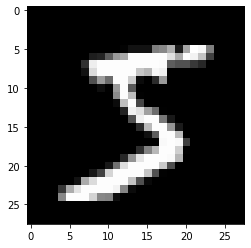

In [ ]:
plt.imshow(x_train[0].reshape(28, 28), cmap="gray")

In [ ]:
input_layer = layers.Input(shape=(784,))
encoded = layers.Dense(64, activation="relu")(input_layer)
decoded = layers.Dense(784, activation="sigmoid")(encoded)

In [ ]:
nn = models.Model(input_layer, decoded)
encoder = models.Model(input_layer, encoded)
decoder = models.Model(encoded, decoded)

In [ ]:
nn.compile(optimizer="rmsprop", loss="binary_crossentropy")

In [ ]:
nn.fit(x_train, x_train, epochs=20)

In [ ]:
x_pred = nn.predict(x_test)

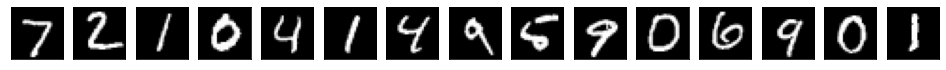

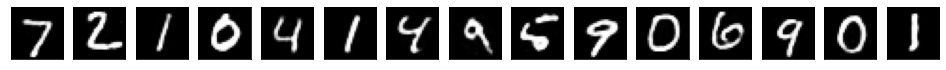

In [ ]:
def plot_img(x, h, w):
  fig = plt.figure(figsize=(20, 6))
  for i in range(x.shape[0]):
    ax = fig.add_subplot(4, 18, i+1, xticks=[], yticks=[])
    ax.imshow(x[i].reshape(h, w), cmap="gray")

plot_img(x_test[:15], 28, 28)
plot_img(x_pred[:15], 28, 28)

In [ ]:
x_encoded = encoder.predict(x_test)
x_decoded = decoder.predict(x_encoded)

313/313 [==============================] - 1s 2ms/step


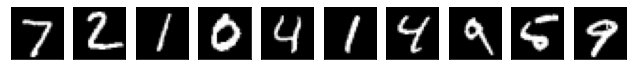

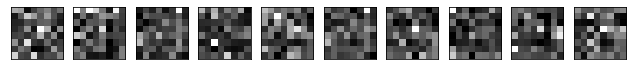

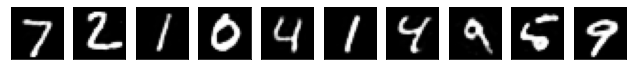

In [ ]:
plot_img(x_test[:10], 28, 28)
plot_img(x_encoded[:10], 8, 8)
plot_img(x_decoded[:10], 28, 28)